# Regression - Large Dataset - NO Feature Engineering: Salaries.csv 

## Problem Statement:
deduce the difference between gradient descent model i.e (logistic, svm), and naive bayes, decision tree, and knn with large, and small datasets, also figure out the effect of feature engineering on the accuracy metric.

hints: use the projects discussed in previous lectures.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('C:/Users/Nada Abbas/Desktop/Folder for all/Epsilon AI Diploma/dastasets/Salaries.csv')
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


BasePay, OvertimePay, OtherPay, Benefits, Notes, Status - are the columns containing NaN values

In [4]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [5]:
df = df.drop(['Notes','Status'], axis=1)
df.info() #Only dropped empty columns since there is no use of them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


In [6]:
df.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [7]:
df[df['OvertimePay'].isna()==True]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [8]:
df[df['OtherPay'].isna()==True]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [9]:
df = df.drop(df[df['OvertimePay'].isna()==True].index)

In [10]:
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True) # float deal with it using mean

In [11]:
nan_benefits_perc = df['Benefits'].isna().sum()*100/len(df)
print(f'{nan_benefits_perc} % of total rows are Nan values')

24.32492431886983 % of total rows are Nan values


In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['Benefits'] = imputer.fit_transform(df[['Benefits']]) 
# the best practice is to use the KNN imputer but this error keeps rising due to my laptop low capabilities

MemoryError: Unable to allocate 40.0 GiB for an array with shape (36159, 148650) and data type float64

C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


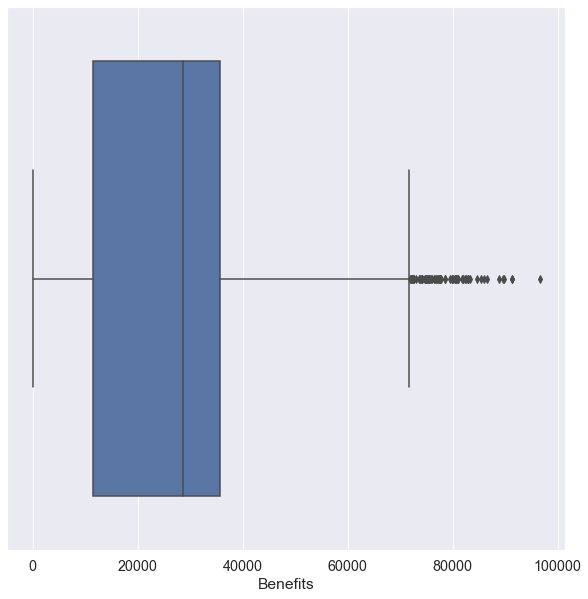

In [12]:
sns.boxplot(df['Benefits'])

In [12]:
# since benefits contain outliers so the best practice is to use median to replace the NaNs
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

In [13]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [14]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


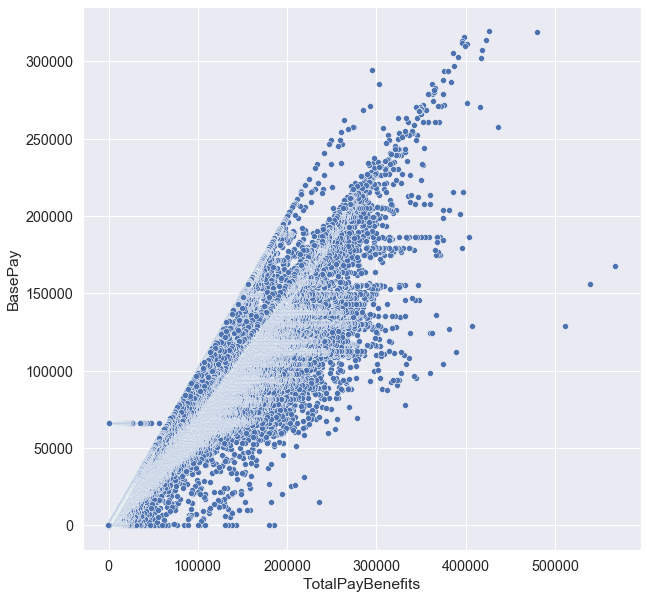

In [15]:
sns.scatterplot(x = df['TotalPayBenefits'], y= df['BasePay'])

the target here is the totalPayBenefits which is numerical value (regression problem)

the type of models to use are: Multiple and Polynomial regressions, SVM, Decision Tree, Random Forest

## 1- Gradiend Descend: Logistic Regression:
since logistic regression depends on an all numeric feature input so, I will drop: emplyeeName, JobTitle, Agency

In [16]:
df_reg = df.drop(['Id', 'EmployeeName', 'JobTitle', 'Agency'], axis=1)
df_reg.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011
1,155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011
2,212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011
3,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011
4,134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011


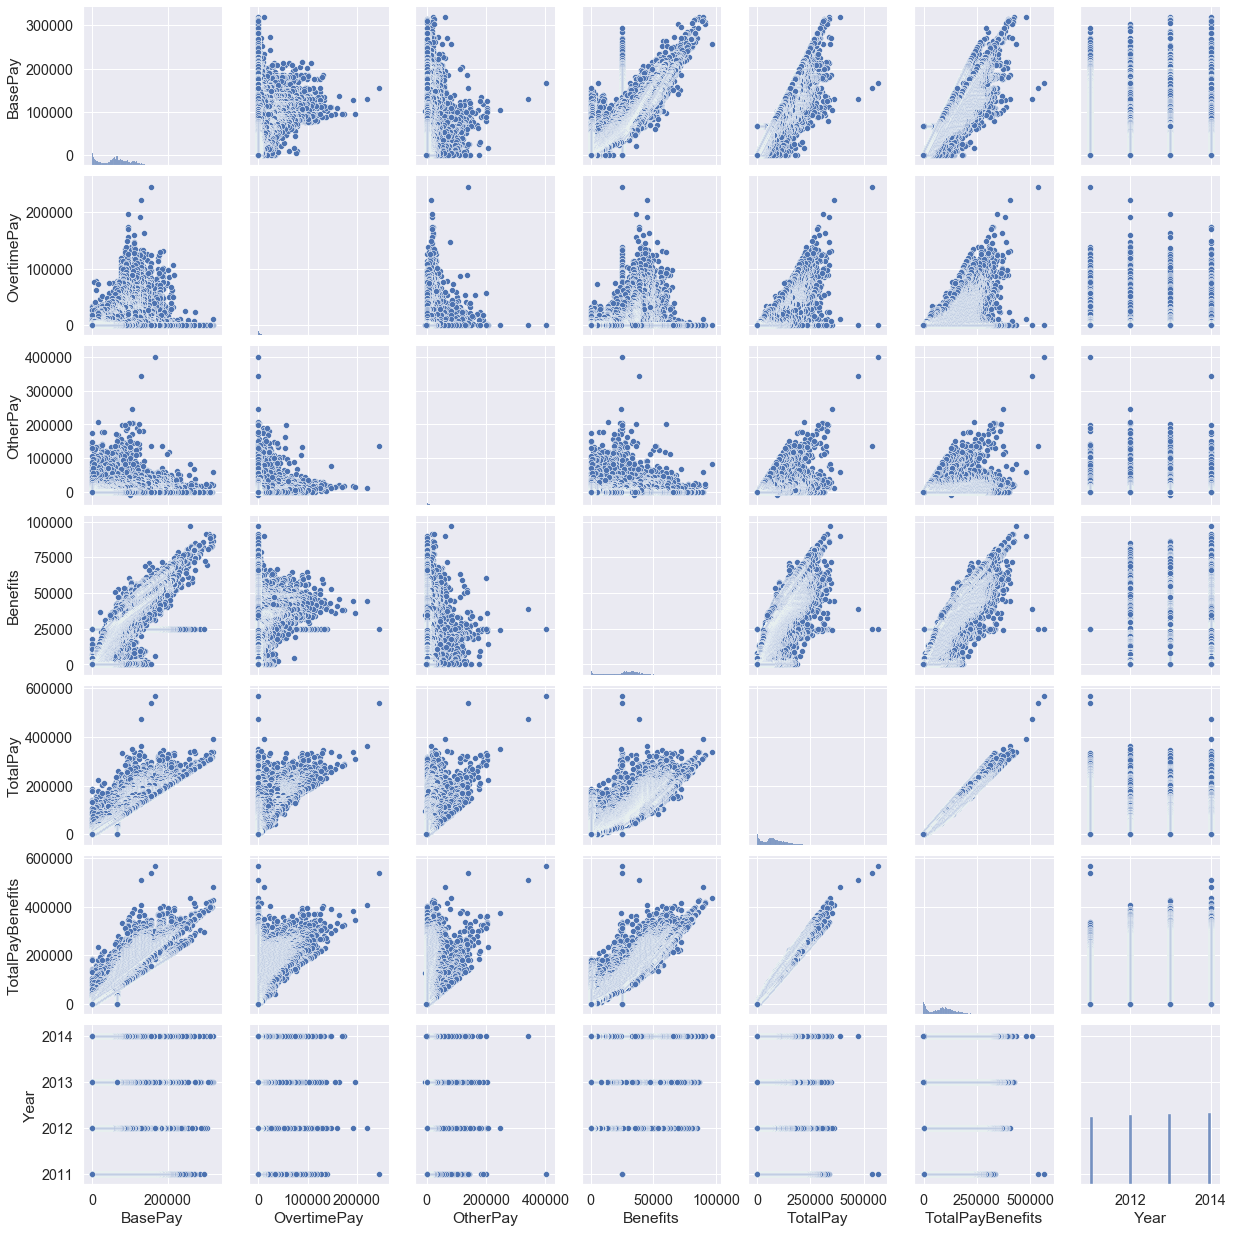

In [54]:
sns.pairplot(data=df_reg)

In [17]:
Y = df_reg['TotalPayBenefits']
X = df_reg.drop(['TotalPayBenefits'], axis=1)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=150)

In [37]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

In [38]:
print(f'Training Score: {linReg.score(x_train, y_train)}')
print(f'Test Score: {linReg.score(x_test, y_test)}')

Training Score: 0.988205696361235
Test Score: 0.9883903064183792


In [39]:
# root mean square error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')

Root Mean Square Error: 6803.443417441415


In [40]:
print(f'coefficients: {linReg.coef_}')
print(f'b (interception): {linReg.intercept_}')
pd.DataFrame(linReg.coef_, X.columns, columns=["Coeff"])

coefficients: [4.24865353e-02 4.81065954e-02 5.12331477e-02 1.03506075e+00
 9.51183207e-01 7.43070860e+03]
b (interception): -14961023.932153871


,Coeff
BasePay,0.042487
OvertimePay,0.048107
OtherPay,0.051233
Benefits,1.035061
TotalPay,0.951183
Year,7430.708598


## 2- Gradient Descent: Polynomial Regression:
polynomial regression is used for a single feature what if I use it to convert all input features into polynomial form

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [42]:
x_train_poly

array([[1.00000000e+00, 1.66478700e+04, 0.00000000e+00, ...,
        5.58183273e+11, 6.75270237e+10, 8.16917874e+09],
       [1.00000000e+00, 9.06930600e+04, 0.00000000e+00, ...,
        1.85312869e+13, 3.88793013e+11, 8.15701620e+09],
       [1.00000000e+00, 8.63730600e+04, 4.18371000e+03, ...,
        1.78004567e+13, 3.81049359e+11, 8.15701620e+09],
       ...,
       [1.00000000e+00, 6.01750000e+04, 2.31837000e+03, ...,
        8.68764003e+12, 2.66403612e+11, 8.16917874e+09],
       [1.00000000e+00, 9.67323600e+04, 0.00000000e+00, ...,
        1.89484222e+13, 3.92851568e+11, 8.14486573e+09],
       [1.00000000e+00, 3.99423400e+04, 0.00000000e+00, ...,
        3.20992574e+12, 1.61692344e+11, 8.14486573e+09]])

In [43]:
linReg.fit(x_train_poly, y_train)
y_pred = linReg.predict(x_test_poly)

In [44]:
print(f'Training Score: {linReg.score(x_train_poly, y_train)}')
print(f'Test Score: {linReg.score(x_test_poly, y_test)}') # Lower Accuracy

Training Score: 0.9659690491854901
Test Score: 0.8941145157622693


In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') # higher RMSE

Root Mean Square Error: 20546.441315184748


In [46]:
print(f'coefficients: {linReg.coef_}')
print(f'b (interception): {linReg.intercept_}') # 6 features * 3 degree of polynomials each

coefficients: [-1.33396091e-06  5.26260045e+02  1.09210084e+02 -2.55544115e+02
  3.46887120e-01 -5.11891127e+01  7.30331526e+01 -2.65536609e+01
 -2.67835738e+01 -2.24767090e+01  5.99955680e+00  2.05152674e+01
  1.63417376e+00 -2.31388273e-01  3.84478780e+00  6.00710024e+00
 -5.80695835e+00  1.89538220e+00  4.07588267e+00  5.99619712e+00
 -1.01133885e+01  2.37548632e+00  1.49799201e-02 -5.99934121e+00
 -3.95104287e-01  6.03752128e+00 -2.03413207e+00  4.70162376e+03
 -3.40803731e-01 -1.27601393e+01 -1.28021001e+01 -1.05817016e-01
  1.31451748e+01  1.12554589e+01 -7.93957899e+01 -4.97422609e+01
 -8.29113593e+01  3.52099485e+01  5.33494966e+00  2.96535290e+01
 -8.29113593e+01 -7.38393703e+01  6.71535754e+00 -1.23577593e-10
  8.29113593e+01  3.48353769e+00  4.41858413e+01 -1.80182016e+01
 -4.38367611e-01 -6.69764543e+01 -9.18380833e+01 -8.28055423e+01
  7.69626962e+01 -5.92050859e+00  1.72531964e+01 -1.65611084e+02
 -6.42571669e+01 -1.04606095e+01 -9.98293004e-10  1.65611085e+02
  3.4835339

## 3- Gradient Descent: SVM - Linear:
https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution

SVM is not the best approach for very large dataset - could train it on multiple batches for the data (batch learning) - it also requires feature scaling to work better

In [ ]:
from sklearn.svm import SVR

svm = SVR(kernel='linear') # select linear kernel since the distribution of datapoints is linear
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [ ]:
print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') 

## 4- Gradient Descent: SVM - Polynomial:

In [ ]:
svm = SVR(kernel='poly') # just testing for polynomial SVM since it gave better results in Regression
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test) # very slow model

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') 

## 5- Decision Tree:

In [47]:
from sklearn.tree import DecisionTreeRegressor

DecTree = DecisionTreeRegressor()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

print(f'Training Score: {DecTree.score(x_train, y_train)}')
print(f'Test Score: {DecTree.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')                       # generated best results: optimum training score 1 and test score
                                                               # also RMSE is very low relatively

Training Score: 1.0
Test Score: 0.9998449454545393
Root Mean Square Error: 786.2499839958834
